In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from game import *
from random_strat import *

In [3]:
board = np.zeros( (4,4,5), dtype=np.uint8)
plotBoard(board)

|  |  |  |  |
|  |  |  |  |
|  |  |  |  |
|  |  |  |  |



In [4]:
pieces = np.zeros((5,16), dtype=np.uint8)
pieces[1,1::2] = 1
pieces[2,2::4] = 1
pieces[2,3::4] = 1
pieces[3,4:8] = 1
pieces[3,12:] = 1
pieces[4,8:] = 1
plotPieces(pieces)

 0   1   2   3   4   5   6   7   8   9   10   11   12   13   14   15  


In [5]:
plotGame(placeRandom, giveRandom, placeRandom, giveRandom)

*0*  1   2   3   4   5   6   7   8   9   10   11   12   13   14   15  
|  |  |  |  |
|  |  |  |  |
|  |  |  |  |
|  |  |00|  |

*0* *1*  2   3   4   5   6   7   8   9   10   11   12   13   14   15  
|  |  |  |  |
|  |  |  |  |
|01|  |  |  |
|  |  |00|  |

*0* *1*  2   3   4   5   6   7   8   9  *10*  11   12   13   14   15  
|  |  |  |  |
|  |  |  |  |
|01|  |  |10|
|  |  |00|  |

*0* *1*  2   3   4   5   6   7   8   9  *10*  11   12   13   14  *15* 
|  |  |  |  |
|  |  |15|  |
|01|  |  |10|
|  |  |00|  |

*0* *1*  2   3   4   5   6  *7*  8   9  *10*  11   12   13   14  *15* 
|  |  |  |  |
|  |  |15|  |
|01|  |  |10|
|  |07|00|  |

*0* *1*  2   3   4   5   6  *7* *8*  9  *10*  11   12   13   14  *15* 
|  |  |  |  |
|  |  |15|08|
|01|  |  |10|
|  |07|00|  |

*0* *1* *2*  3   4   5   6  *7* *8*  9  *10*  11   12   13   14  *15* 
|  |02|  |  |
|  |  |15|08|
|01|  |  |10|
|  |07|00|  |

*0* *1* *2*  3   4   5  *6* *7* *8*  9  *10*  11   12   13   14  *15* 
|  |02|  |  |
|  |  |15|08|
|01| 

-1

In [6]:
%%timeit
game(placeRandom, giveRandom, placeRandom, giveRandom)

5 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
N = 10**4
res = np.zeros(N, dtype=np.int32)
for i in range(N):
    res[i] = game(placeRandom, giveRandom, placeRandom, giveRandom)

In [8]:
f = np.sum(res==1)/N
print(f'wins: {100*f:.2f}±{100*1.96*np.sqrt(f*(1-f))/np.sqrt(N):.2f}%')
f = np.sum(res==0)/N
print(f'ties: {100*f:.2f}±{100*1.96*np.sqrt(f*(1-f))/np.sqrt(N):.2f}%')
f = np.sum(res==-1)/N
print(f'lost: {100*f:.2f}±{100*1.96*np.sqrt(f*(1-f))/np.sqrt(N):.2f}%')

s = np.sum(res)
print(f'overall: {100*s/N:.3f}%')

wins: 48.68±0.98%
ties: 1.86±0.26%
lost: 49.46±0.98%
overall: -0.780%


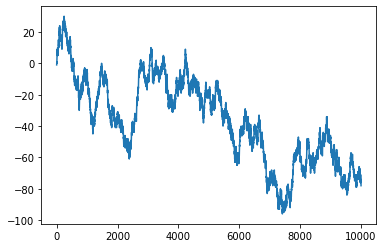

In [9]:
plt.plot(np.cumsum(res))
plt.show()